In [1]:
#Import neccessary libraries:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from numpy.random import random
import seaborn as sns
from bokeh.layouts import gridplot,row
from bokeh.plotting import figure, output_file, show
from bokeh.io import output_notebook
from mpl_toolkits.mplot3d import Axes3D

%matplotlib inline
output_notebook()

Loading BokehJS ...

# Datset reference: weather website
# Precipitaion is in inches

In [2]:
#Reading the datasets:
Charlotte_weather=pd.read_csv("Weather_Charlotte.csv")
Chicago_weather=pd.read_csv("Weather_Chicago.csv")
print(Charlotte_weather)

    Year  Month  Day  Hour  Minute  Temperature daily mean [2 m above gnd]  \
0   2019      8    1     0       0                                   75.97   
1   2019      8    2     0       0                                   77.50   
2   2019      8    3     0       0                                   80.26   
3   2019      8    4     0       0                                   80.32   
4   2019      8    5     0       0                                   75.86   
5   2019      8    6     0       0                                   75.97   
6   2019      8    7     0       0                                   77.50   
7   2019      8    8     0       0                                   80.26   
8   2019      8    9     0       0                                   80.32   
9   2019      8   10     0       0                                   75.86   
10  2019      8   11     0       0                                   80.00   
11  2019      8   12     0       0                              

# (1) Scatter plot using matplotlib for charlotte weather :

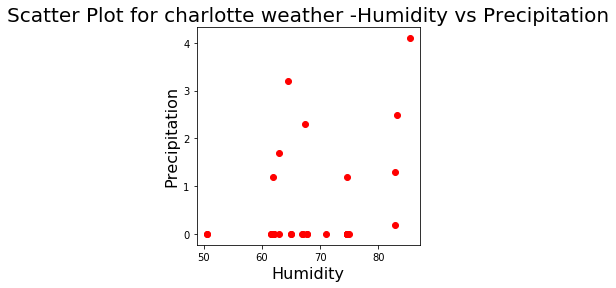

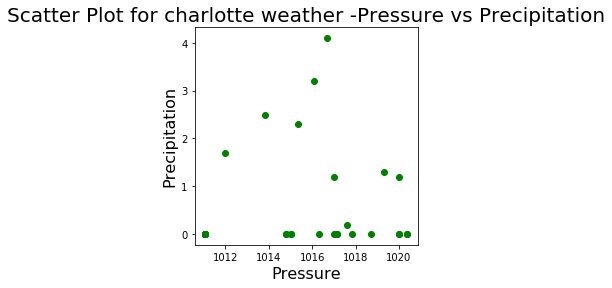

In [23]:
#Extracting required variables from the dataset:
Precipitation_Charlotte=Charlotte_weather['Total Precipitation (high resolution) daily sum [sfc]']
Humidity_Charlotte=Charlotte_weather['Relative Humidity daily mean [2 m above gnd]']
Pressure_Charlotte=Charlotte_weather['Mean Sea Level Pressure daily mean [MSL]']

plt.scatter(Humidity_Charlotte,Precipitation_Charlotte,c='r',marker='o')
plt.xlabel('Humidity', fontsize=16)
plt.ylabel('Precipitation', fontsize=16)
plt.title('Scatter Plot for charlotte weather -Humidity vs Precipitation',fontsize=20)
plt.rc('figure', figsize = (4, 4))
plt.show()
plt.scatter(Pressure_Charlotte,Precipitation_Charlotte,c='g',marker='o')
plt.xlabel('Pressure', fontsize=16)
plt.ylabel('Precipitation', fontsize=16)
plt.title('Scatter Plot for charlotte weather -Pressure vs Precipitation',fontsize=20)
plt.rc('figure', figsize = (4, 4))
plt.show()

# (2) 3D Scatter plot using matplotlib (For Charlotte and Chicago) :

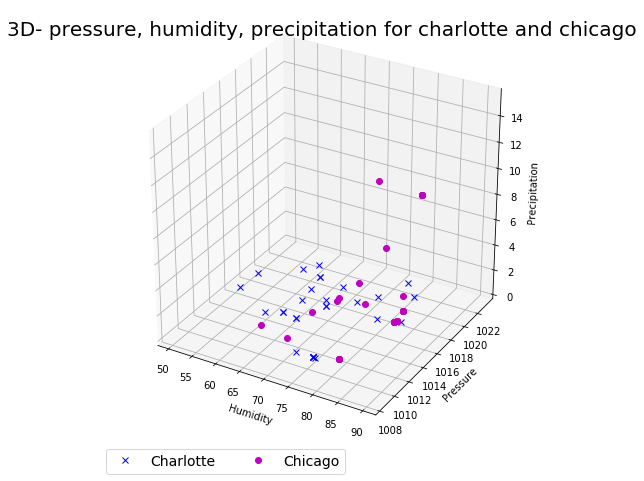

In [36]:
# extracting required variables from chicago weather dataset;
Precipitation_Chicago=Chicago_weather['Total Precipitation (high resolution) daily sum [sfc]']
Humidity_Chicago=Chicago_weather['Relative Humidity daily mean [2 m above gnd]']
Pressure_Chicago=Chicago_weather['Mean Sea Level Pressure daily mean [MSL]']

#Plotting:
colors=['b', 'm']
ax = plt.subplot(111, projection='3d')
ax.plot(Humidity_Charlotte, Pressure_Charlotte, Precipitation_Charlotte, 'x', color=colors[0], label='Charlotte')
ax.plot(Humidity_Chicago, Pressure_Chicago, Precipitation_Chicago, 'o', color=colors[1], label='Chicago')
ax.set_xlabel('Humidity')
ax.set_ylabel('Pressure')
ax.set_zlabel('Precipitation')
plt.title('3D- pressure, humidity, precipitation for charlotte and chicago',fontsize=20)
plt.legend(loc='upper left', numpoints=1, ncol=3, fontsize=14, bbox_to_anchor=(0, 0))
plt.rc('figure', figsize = (8, 8))
plt.show()

# (3) LINE GRAPH PLOT showing daywise Precipitation for Charlotte and Chicago:

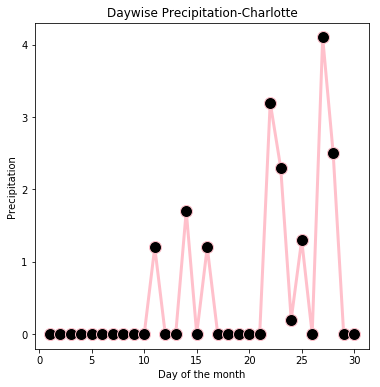

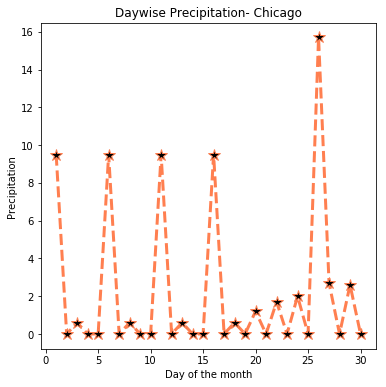

In [27]:
day_Chicago=Chicago_weather['Day']
day_Charlotte=Charlotte_weather['Day']

plt.plot(day_Charlotte, Precipitation_Charlotte, label = "line 1",color='pink', linewidth = 3, 
        marker='o', markerfacecolor='black', markersize=12) 
plt.title('Daywise Precipitation-Charlotte') 
plt.xlabel('Day of the month')  
plt.ylabel('Precipitation') 
plt.rc('figure', figsize = (6, 6))
plt.show() 

plt.plot(day_Chicago, Precipitation_Chicago, label = "line 2",color='coral', linestyle='dashed', linewidth = 3, 
         marker='*', markerfacecolor='black', markersize=12) 
plt.title('Daywise Precipitation- Chicago') 
plt.xlabel('Day of the month')  
plt.ylabel('Precipitation') 
plt.rc('figure', figsize = (6, 6))
plt.show() 

# (4) Bar graph showing daywise Precipitation for Chicago using matplotlib :

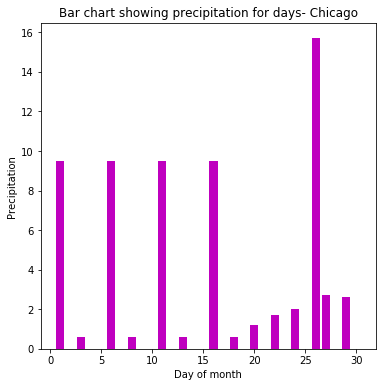

In [28]:
# plotting a bar chart 
plt.bar(day_Chicago, Precipitation_Chicago,width = 0.8, color = ['m']) 
  
# naming the x-axis 
plt.xlabel('Day of month') 
# naming the y-axis 
plt.ylabel('Precipitation') 
# plot title 
plt.title('Bar chart showing precipitation for days- Chicago') 
  
# function to show the plot 
plt.show() 

# (5) Heat map using seaborn representing temperature and cloud grid for Charlotte :

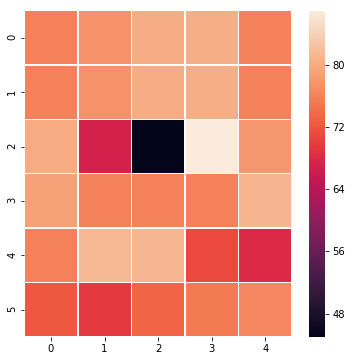

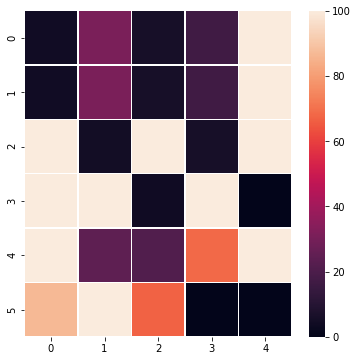

In [29]:
#Converting temperature values into a new matrix:


Temp_Charlotte_reshape=np.asarray(Charlotte_weather['Temperature daily mean [2 m above gnd]']).reshape(6,5)
Cloud_Charlotte_reshape=np.asarray(Charlotte_weather['Total Cloud Cover daily mean [sfc]']).reshape(6,5)

uniform_data = np.random.rand(10, 12)
ax = sns.heatmap(Temp_Charlotte_reshape, linewidth=0.5)
plt.show()
ax = sns.heatmap(Cloud_Charlotte_reshape, linewidth=0.5)
plt.show()

# (6) Corelation matrix using seaborn for Charlotte weather variables:

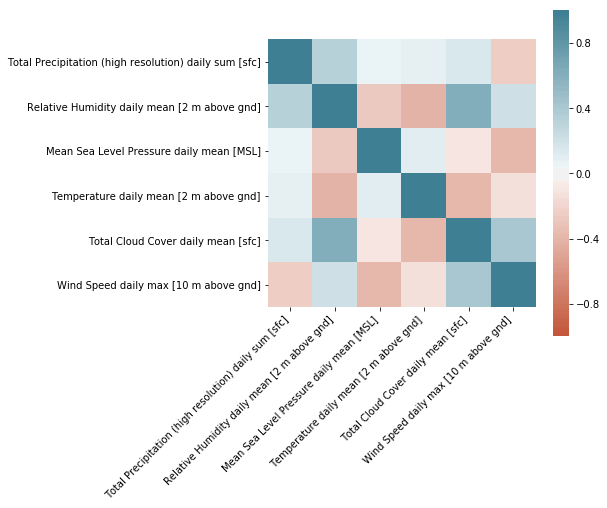

In [30]:
#fetch all required variables to see corelation;

temp=Charlotte_weather['Temperature daily mean [2 m above gnd]']
cloud=Charlotte_weather['Total Cloud Cover daily mean [sfc]']
wind=Charlotte_weather['Wind Speed daily max [10 m above gnd]']

#creat a new dataframe using these variables:
frames1=[Precipitation_Charlotte,Humidity_Charlotte,Pressure_Charlotte,temp,cloud,wind]
Charlotte_weather_new=pd.concat(frames1,axis=1)
corr = Charlotte_weather_new.corr()
ax = sns.heatmap(corr, vmin=-1, vmax=1, center=0,cmap=sns.diverging_palette(20, 220, n=200), square=True)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right');

# (7) Interactive visualization using bokeh showing daywise precipitation:

In [48]:
s1 = figure(width=450, plot_height=250, title=None)
s1.circle(day_Chicago, Precipitation_Chicago, size=10, color="navy", alpha=0.5)
s2 = figure(width=450, plot_height=250, title=None)
s2.circle(day_Charlotte, Precipitation_Charlotte, size=10, color="red", alpha=0.5)
s1.xaxis.axis_label = 'Days'
s1.yaxis.axis_label = 'Precipitation_Chicago'
s2.xaxis.axis_label = 'Days'
s2.yaxis.axis_label = 'Precipitation_Charlotte'
t=show(row(s1),notebook_handle=True)
t=show(row(s2),notebook_handle=True)

# (8) Interactive visualization showing daywise temperatures for Charlotte and chicago using bokeh:

In [33]:
#create a new plot with a title and axis labels
temp_chicago=Chicago_weather['Temperature daily mean [2 m above gnd]']

p = figure(title="Daywise temperature-For charlotte", x_axis_label='Days', y_axis_label='Temperature')

# add a line renderer with legend and line thickness
p.line(day_Charlotte, temp, legend="Temp-Charlotte", line_width=4,color='black')
p.line(day_Chicago, temp_chicago, legend="Temp-Chicago", line_width=4,color='red')

# show the results
show(p)